# Lab 5 - Kernel Methods

## Ex 1 - Kernel Methods

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [2]:
def linearKernel(X1, X2):

    return X1 @ X2.T

 
def gaussianKernel(X1, X2, sigma = 0.1):

    m = X1.shape[0]
    K = np.zeros((m,X2.shape[0]))
     
    for i in range(m):
        K[i,:] = np.exp((-(np.linalg.norm(X1[i,:]-X2, axis=1)**2))/(2*sigma**2))
     
    return K

In [116]:
K = linearKernel # uncomment for linear kernel
#K = gaussianKernel

## Ex 2 - Support Vector Machines

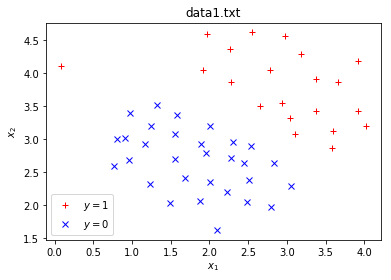

In [117]:
# # Load the dataset
fname='data1.txt'
data = np.loadtxt('data/%s' % fname, delimiter=',')
 
X = data[:, 0:2] 
y = data[:, 2]
 
# # Plot data 
plt.plot(X[:,0][y == 1], X[:,1][y == 1], 'r+', label="$y=1$")
plt.plot(X[:,0][y == 0], X[:,1][y == 0], 'bx', label="$y=0$")
plt.title(fname)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

In [122]:
C = 2.0  # SVM regularization parameter
# Create an instance of SVM and fit out data. 
# We do not scale our data since we want to plot the support vectors
svc = SVC(C = C, kernel="linear")
svc.fit(K(X,X),y)

SVC(C=2.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

/Users/gsalha/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


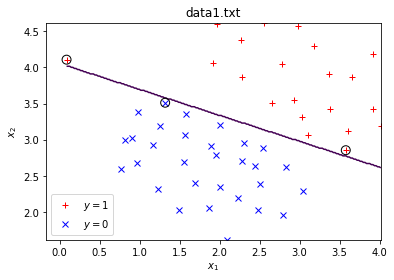

In [123]:
# Plot the decision boundary
u = np.linspace(min(X[:, 0]),max(X[:, 0]), 200)
v = np.linspace(min(X[:, 1]),max(X[:, 1]), 200)
z = np.zeros(shape=(len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        x = np.array([[u[i],v[j]]])
        z[i, j] = svc.predict(K(x,X))
         
plt.plot(X[:,0][y == 1], X[:,1][y == 1], 'r+', label="$y=1$")
plt.plot(X[:,0][y == 0], X[:,1][y == 0], 'bx', label="$y=0$")
plt.scatter(X[svc.support_, 0], X[svc.support_, 1], s=80, facecolors='none', zorder=10, edgecolor='k')
plt.contour(u, v, z.T, [0])
plt.title(fname)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

In [32]:
#Compute accuracy on the validation set
#p = svc.predict(gaussianKernel(Xval,X,sigma))
 
#Compute accuracy on the training set
p = svc.predict(K(X,X))
counter = 0
for i in range(y.size):
    if p[i] == y[i]:
        counter += 1
        
print('Train Accuracy: %f' % (counter / float(y.size) * 100.0))

Train Accuracy: 58.823529


## Ex 3 - Spectral Clustering

In [125]:
def get_circle(r=1.0, N=150):  
    # Use polar coords to get unif dist points  
    step = np.pi * 2.0 / N  
    t = np.arange(0, np.pi * 2.0, step)  
    x_1 = r * np.cos(t)  
    x_2 = r * np.sin(t)  
    return np.column_stack((x_1, x_2))
      
def get_noise(stddev=0.2, N=150):  
    # 2d gaussian random noise  
    x_1 = np.random.normal(0, stddev, N)  
    x_2 = np.random.normal(0, stddev, N)  
    return np.column_stack((x_1, x_2))    
  
def generateData():
    return np.vstack([get_circle(r=1) + get_noise(), get_circle(r=4) + get_noise()])
 
 
X = generateData()
n,d = X.shape
k = 2

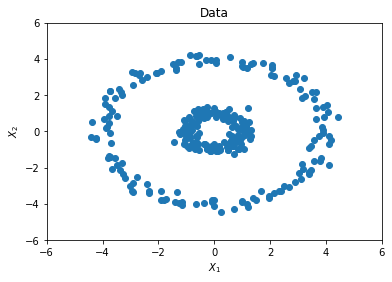

In [126]:
# Plot data
plt.figure(1)
plt.scatter(X[:,0], X[:,1])
plt.xlabel('$X_1$')  
plt.ylabel('$X_2$')
plt.title('Data')
plt.ylim(-6, 6)  
plt.xlim(-6, 6) 
plt.show()

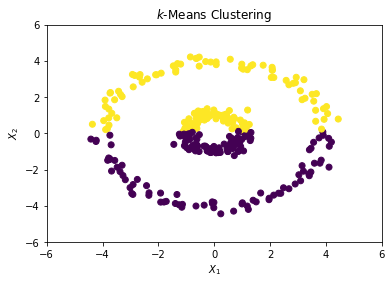

In [128]:
# k-Means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
labels = kmeans.labels_
 
# Plot data
plt.figure(2)
plt.scatter(X[:,0], X[:,1], c=labels, facecolors="none") 
plt.xlabel('$X_1$')  
plt.ylabel('$X_2$')
plt.title('$k$-Means Clustering')
plt.ylim(-6, 6)  
plt.xlim(-6, 6) 
#plt.savefig("fig/spectral_clustering_kmeans.pdf")
plt.show()

In [129]:
from scipy.spatial.distance import pdist, squareform
pairwise_sq_dists = squareform(pdist(X, 'sqeuclidean'))
W = np.exp(-pairwise_sq_dists / 1**2)
  
# Create degree matrix
D = np.diag(np.sum(W, axis=0))
 
# Create Laplacian matrix
L = D - W
 
# EVD
Lambda, U = np.linalg.eig(L) 
# Top-k Sorted eigenvalues
idx = Lambda.argsort() 
U = U[:,idx] 
Z = U[:,:k] 

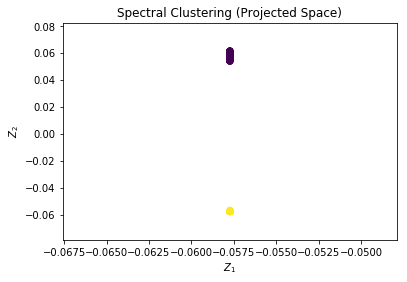

In [130]:
# k-Means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k, random_state=0).fit(Z)
labels = kmeans.labels_
  
plt.figure(3)
plt.scatter(Z[:,0], Z[:,1], c=labels, facecolors="none") 
plt.xlabel('$Z_1$')  
plt.ylabel('$Z_2$')
plt.title('Spectral Clustering (Projected Space)')
#plt.savefig("fig/spectral_clustering_evplot.pdf")
plt.show()

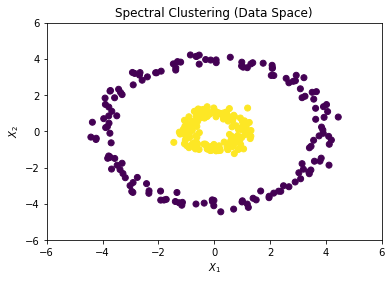

In [132]:
# Plot clustering produced by spectral clustering
plt.figure(4)
plt.scatter(X[:,0], X[:,1], c=labels, facecolors="none") 
plt.xlabel('$X_1$')  
plt.ylabel('$X_2$')
plt.title('Spectral Clustering (Data Space)')
plt.ylim(-6, 6)  
plt.xlim(-6, 6) 
#plt.savefig("fig/spectral_clustering_spectral.pdf")
plt.show()